In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_excel("C:/Users/Dell/task_jar/BA Assignment Walmart Sales.xlsx")
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1


In [25]:
data['Revenue'] = data['Unit price'] * data['Quantity']
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2,40.35
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1,65.82


In [26]:
data.Branch.unique()

array(['A', 'B', 'C'], dtype=object)

In [27]:
city_branch_group = data.groupby(['City', 'Branch']).agg(
    Total_Revenue=('Revenue', 'sum'),
    Average_Revenue=('Revenue', 'mean'),
    Total_Sales=('Quantity', 'sum'),
    Average_Price=('Unit price', 'mean'),
    Transactions=('Invoice ID', 'count')
)
city_branch_group

Total_Revenue  Average_Revenue  Total_Sales  Average_Price  \
City      Branch                                                               
Mandalay  A            34130.09       286.807479          637      53.353866   
          B            37215.93       315.389237          664      56.133305   
          C            29794.62       313.627579          519      57.958316   
Naypyitaw A            35985.64       327.142182          648      54.123182   
          B            35157.75       322.548165          604      57.785688   
          C            34160.14       313.395780          579      57.941009   
Yangon    A            33647.27       295.151491          598      55.639298   
          B            35193.51       311.446991          631      56.011062   
          C            32302.43       285.862212          630      52.684602   

                  Transactions  
City      Branch                
Mandalay  A                119  
          B                118  
          C                 95  
Naypyitaw A                110  
          B                109  
          C                109  
Yangon    A                114  
          B                113  
          C                113

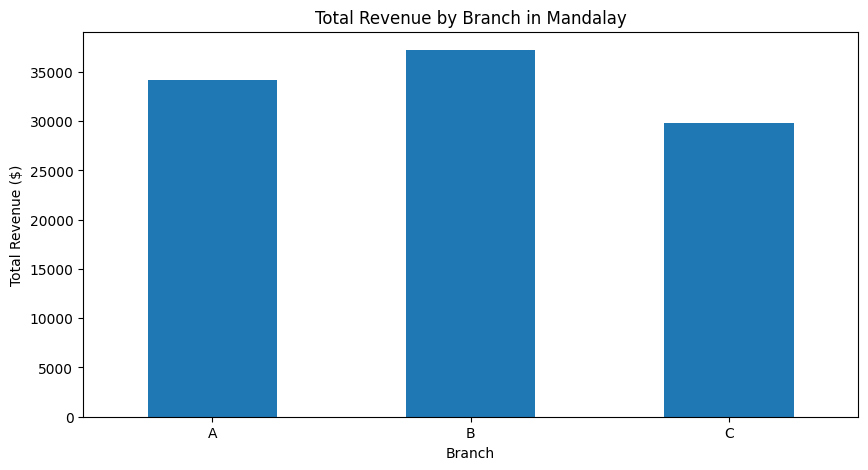

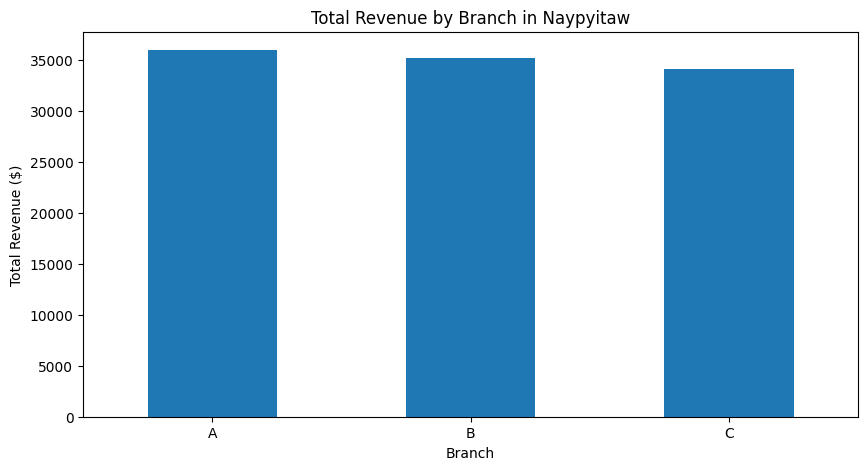

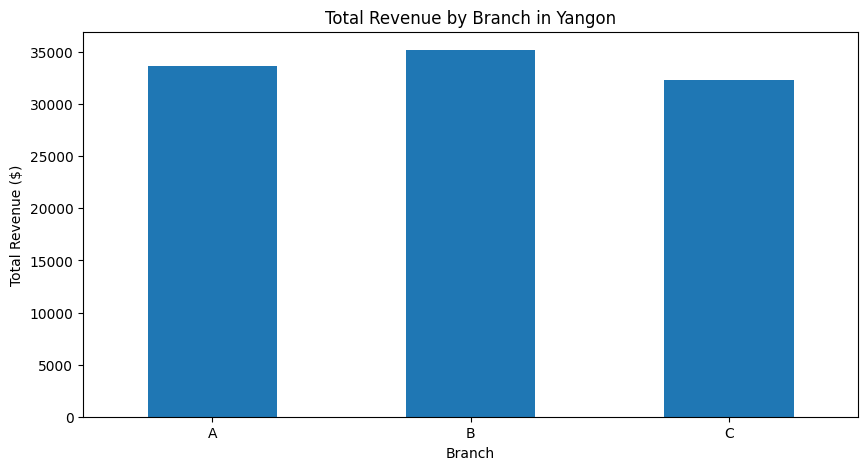

In [28]:
for city in city_branch_group.index.get_level_values(0).unique():
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    city_data = city_branch_group.xs(city, level='City')  # Select data for the current city
    city_data['Total_Revenue'].plot(kind='bar')  # Plot total revenue for each branch as a bar chart
    plt.title(f'Total Revenue by Branch in {city}')  # Set title to indicate the city
    plt.xlabel('Branch')  # Label for x-axis
    plt.ylabel('Total Revenue ($)')  # Label for y-axis
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.show()

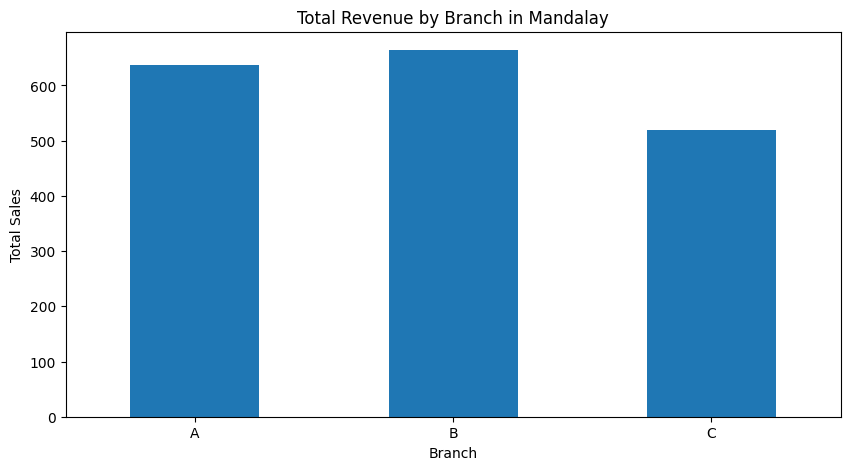

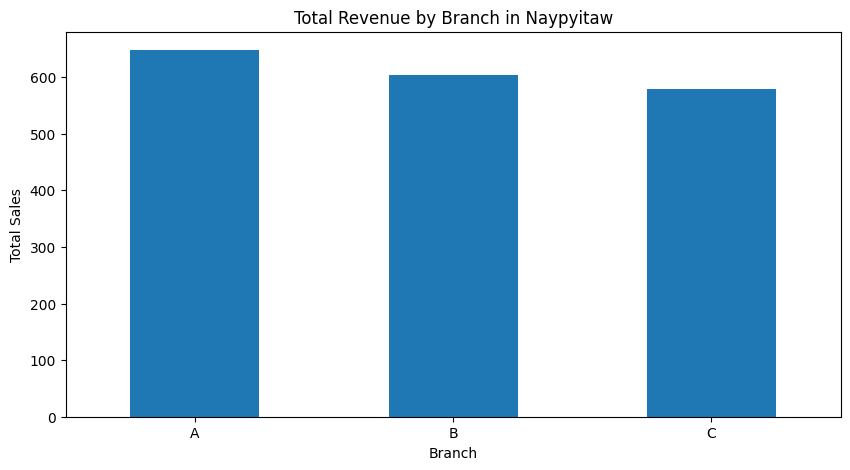

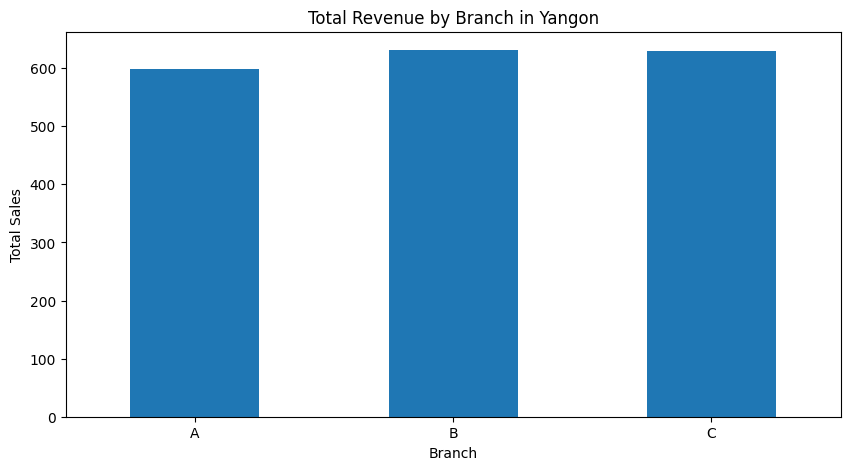

In [29]:
for city in city_branch_group.index.get_level_values(0).unique():
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    city_data = city_branch_group.xs(city, level='City')  # Select data for the current city
    city_data['Total_Sales'].plot(kind='bar')  # Plot total revenue for each branch as a bar chart
    plt.title(f'Total Revenue by Branch in {city}')  # Set title to indicate the city
    plt.xlabel('Branch')  # Label for x-axis
    plt.ylabel('Total Sales')  # Label for y-axis
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.show()

In [30]:
city_branch_group_with_rating = data.groupby(['City', 'Branch']).agg(
    Total_Revenue=('Revenue', 'sum'),
    Average_Revenue=('Revenue', 'mean'),
    Total_Sales=('Quantity', 'sum'),
    Average_Price=('Unit price', 'mean'),
    Transactions=('Invoice ID', 'count'),
    Average_Rating=('Rating', 'mean')  # Calculate average rating
)
city_branch_group_with_rating

Total_Revenue  Average_Revenue  Total_Sales  Average_Price  \
City      Branch                                                               
Mandalay  A            34130.09       286.807479          637      53.353866   
          B            37215.93       315.389237          664      56.133305   
          C            29794.62       313.627579          519      57.958316   
Naypyitaw A            35985.64       327.142182          648      54.123182   
          B            35157.75       322.548165          604      57.785688   
          C            34160.14       313.395780          579      57.941009   
Yangon    A            33647.27       295.151491          598      55.639298   
          B            35193.51       311.446991          631      56.011062   
          C            32302.43       285.862212          630      52.684602   

                  Transactions  Average_Rating  
City      Branch                                
Mandalay  A                119        6.715966  
          B                118        6.965254  
          C                 95        6.763158  
Naypyitaw A                110        7.073636  
          B                109        7.134862  
          C                109        7.010092  
Yangon    A                114        7.066667  
          B                113        6.998230  
          C                113        7.015929

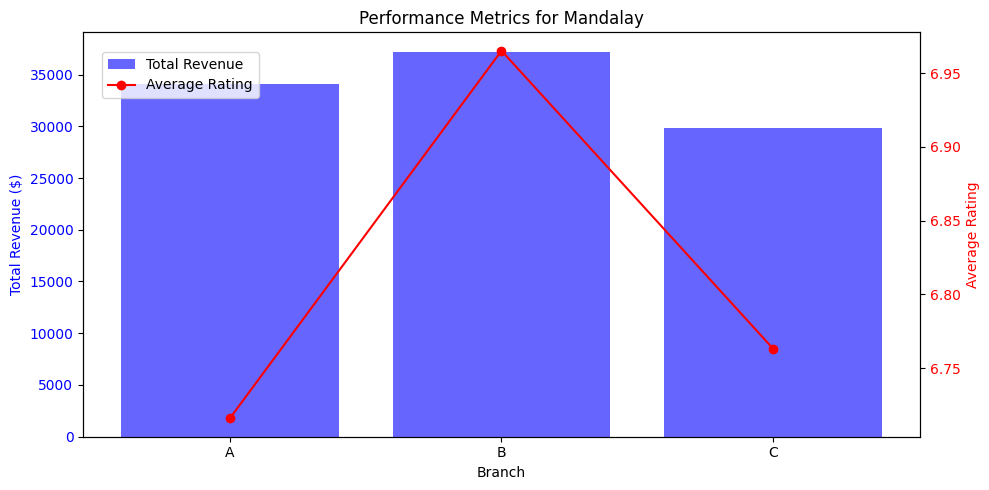

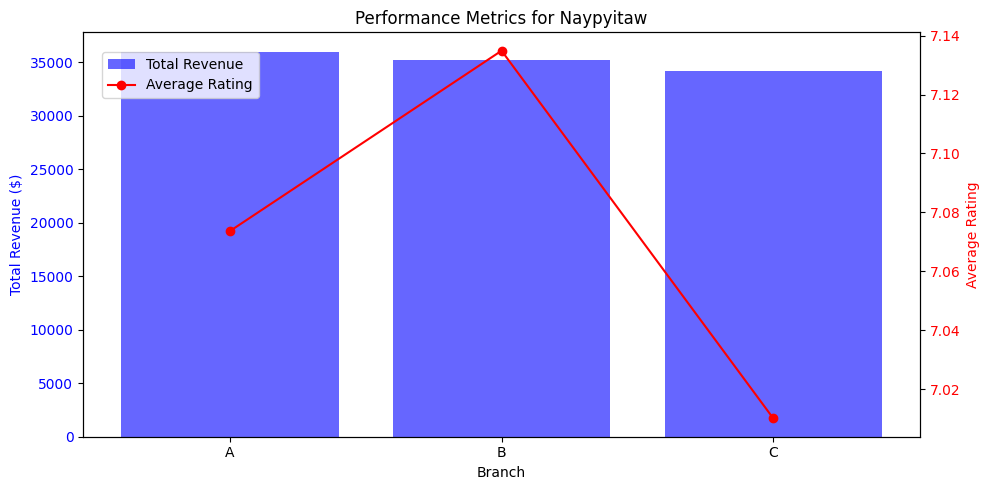

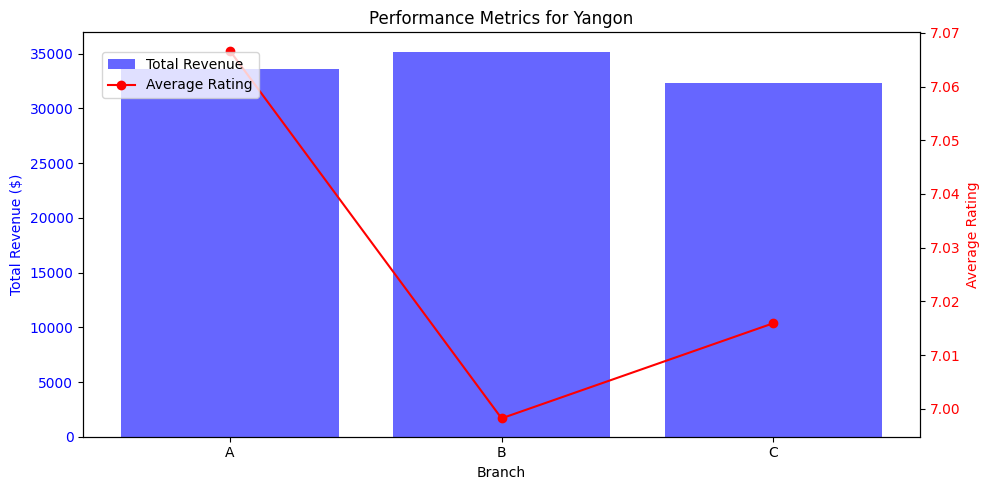

In [31]:
for city in city_branch_group_with_rating.index.get_level_values(0).unique():
    fig, ax1 = plt.subplots(figsize=(10, 5))  # Initialize subplot for dual y-axes

    # Plot Total Revenue
    city_data = city_branch_group_with_rating.xs(city, level='City')
    revenue = city_data['Total_Revenue']
    ax1.bar(revenue.index, revenue, color='b', alpha=0.6, label='Total Revenue')
    ax1.set_xlabel('Branch')
    ax1.set_ylabel('Total Revenue ($)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a second y-axis to plot the average rating
    ax2 = ax1.twinx()  
    rating = city_data['Average_Rating']
    ax2.plot(rating.index, rating, color='r', marker='o', label='Average Rating')
    ax2.set_ylabel('Average Rating', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Title and legends
    plt.title(f'Performance Metrics for {city}')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22396\2279769457.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_product = data.groupby('Product line').resample('M')['Revenue'].sum().unstack(level=0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_22396\2279769457.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_gender = data.groupby('Gender').resample('M')['Revenue'].sum().unstack(level=0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_22396\2279769457.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_payment = data.groupby('Payment').resample('M')['Revenue'].sum().unstack(level=0)


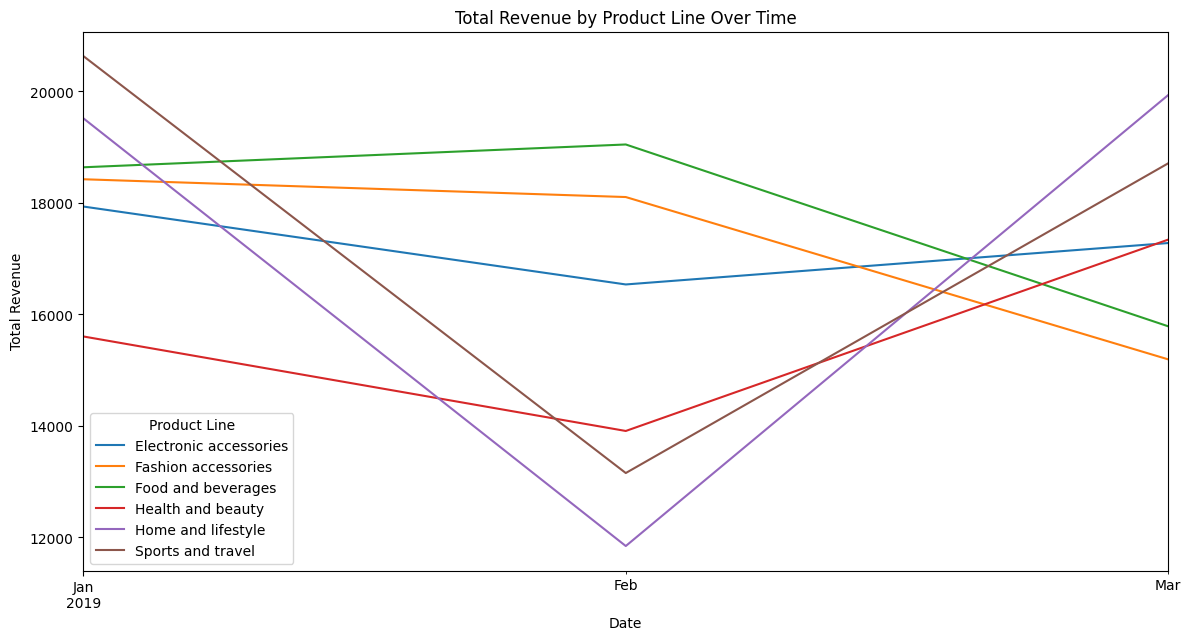

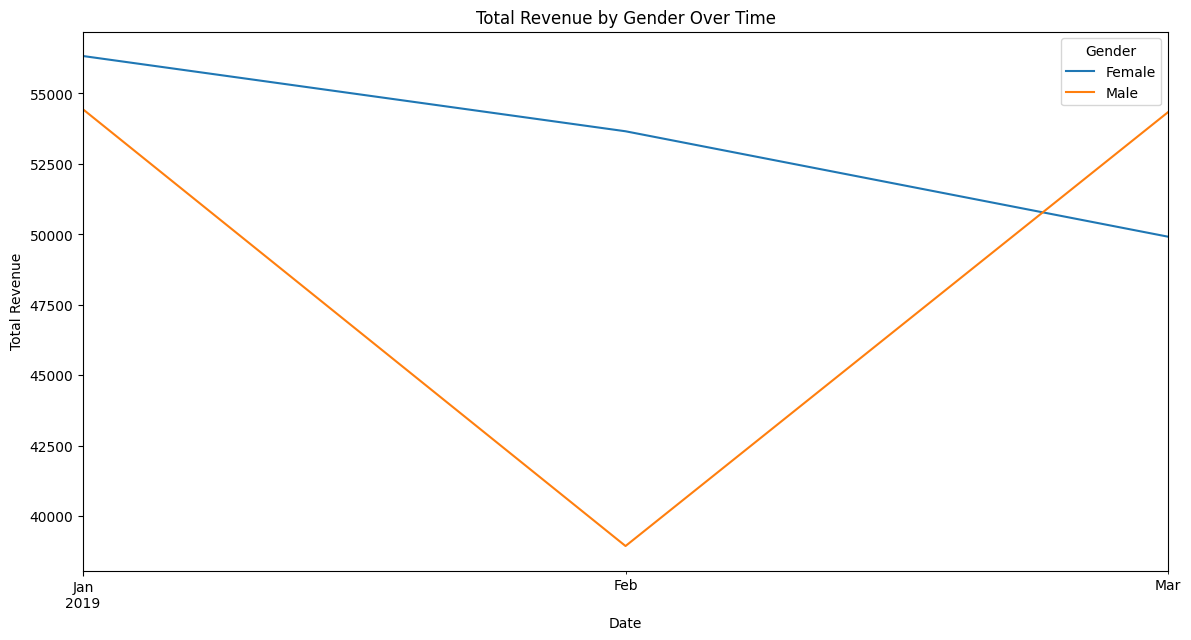

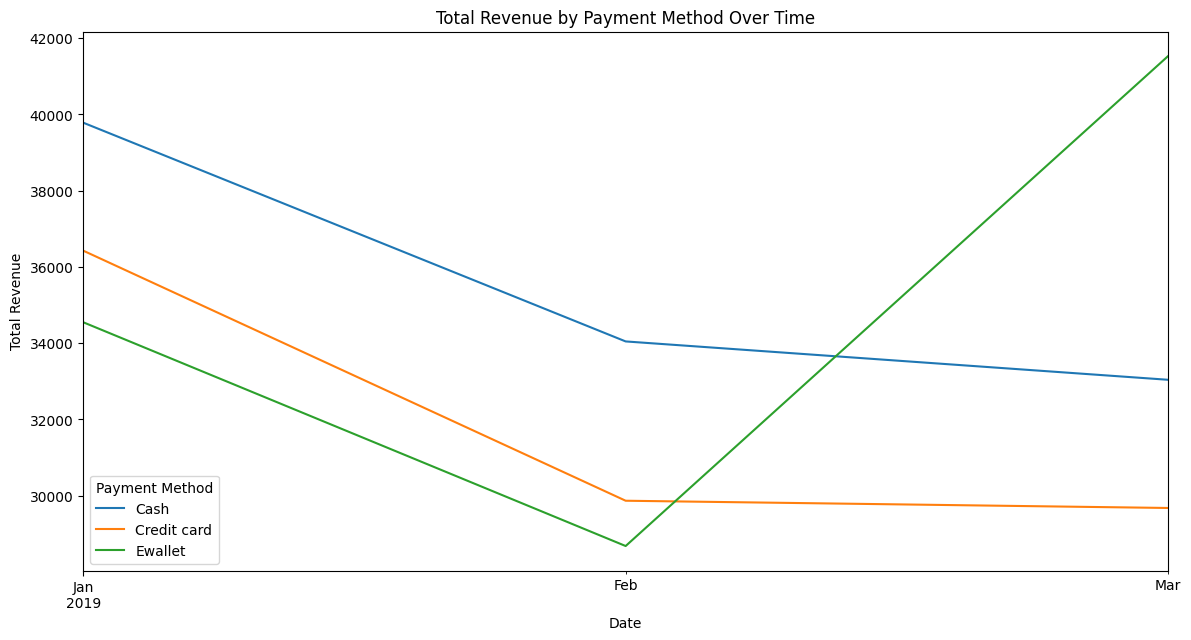

In [32]:
# data['Date'] = pd.t'])o_datetime(data['Date  # Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
# data['Revenue'] = data['Unit price'] * data['Quantity']  # Calculate Revenue

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Resample data by month and calculate total revenue for each category
monthly_revenue_product = data.groupby('Product line').resample('M')['Revenue'].sum().unstack(level=0)
monthly_revenue_gender = data.groupby('Gender').resample('M')['Revenue'].sum().unstack(level=0)
monthly_revenue_payment = data.groupby('Payment').resample('M')['Revenue'].sum().unstack(level=0)

# Plotting
plt.figure(figsize=(14, 7))
monthly_revenue_product.plot(ax=plt.gca())  # Plot all product lines in one graph
plt.title('Total Revenue by Product Line Over Time')
plt.ylabel('Total Revenue')
plt.legend(title='Product Line')

plt.figure(figsize=(14, 7))
monthly_revenue_gender.plot(ax=plt.gca())  # Plot all genders in one graph
plt.title('Total Revenue by Gender Over Time')
plt.ylabel('Total Revenue')
plt.legend(title='Gender')

plt.figure(figsize=(14, 7))
monthly_revenue_payment.plot(ax=plt.gca())  # Plot all payment methods in one graph
plt.title('Total Revenue by Payment Method Over Time')
plt.ylabel('Total Revenue')
plt.legend(title='Payment Method')

plt.show()